<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore")
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lazypredict.Supervised import LazyRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
import missingno as msno
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (30,30) 


<h2>Importing Data</h2>

In [3]:
ld=pd.read_csv('Datasets/Life Expectancy Data.csv')

<h2>Exploring and Visualizing Data</h2>

In [4]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)

In [5]:
ld

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,Afghanistan,2014,Developing,59.90,271.00,64,0.01,73.52,62.00,492,18.60,86,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,Afghanistan,2013,Developing,59.90,268.00,66,0.01,73.22,64.00,430,18.10,89,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,Afghanistan,2012,Developing,59.50,272.00,69,0.01,78.18,67.00,2787,17.60,93,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,Afghanistan,2011,Developing,59.20,275.00,71,0.01,7.10,68.00,3013,17.20,97,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.30,723.00,27,4.36,0.00,68.00,31,27.10,42,67.00,7.13,65.00,33.60,454.37,12777511.00,9.40,9.40,0.41,9.20
2934,Zimbabwe,2003,Developing,44.50,715.00,26,4.06,0.00,7.00,998,26.70,41,7.00,6.52,68.00,36.70,453.35,12633897.00,9.80,9.90,0.42,9.50
2935,Zimbabwe,2002,Developing,44.80,73.00,25,4.43,0.00,73.00,304,26.30,40,73.00,6.53,71.00,39.80,57.35,125525.00,1.20,1.30,0.43,10.00
2936,Zimbabwe,2001,Developing,45.30,686.00,25,1.72,0.00,76.00,529,25.90,39,76.00,6.16,75.00,42.10,548.59,12366165.00,1.60,1.70,0.43,9.80


In [6]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
ld.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2286.00,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,12753375.12,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,61012096.51,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,195793.25,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.75,64.91,92.00,17.00,43.50,4.00,93.00,5.75,93.00,0.10,1766.95,1386542.00,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7420359.00,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1293859294.00,27.70,28.60,0.95,20.70


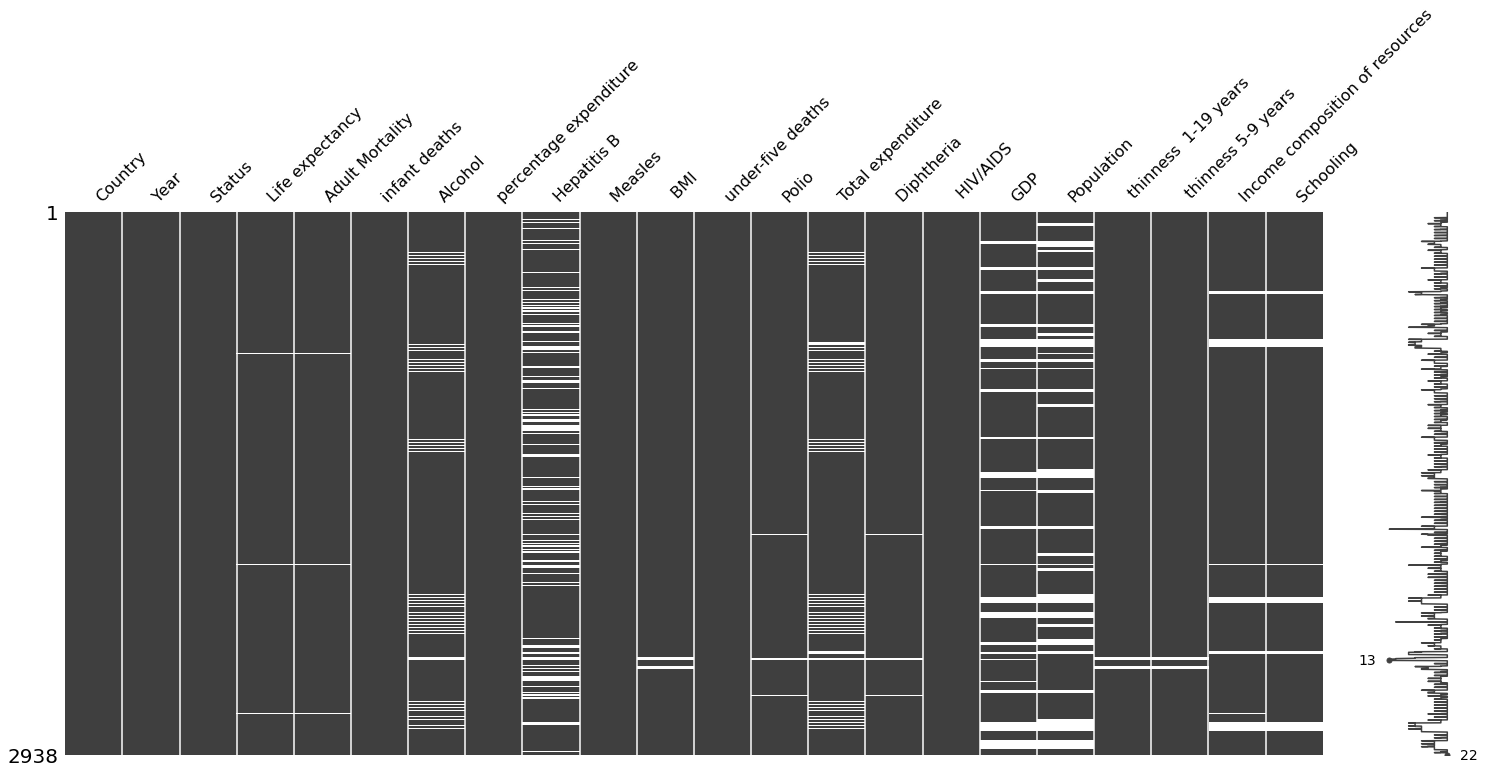

In [8]:
msno.matrix(ld)
plt.show()

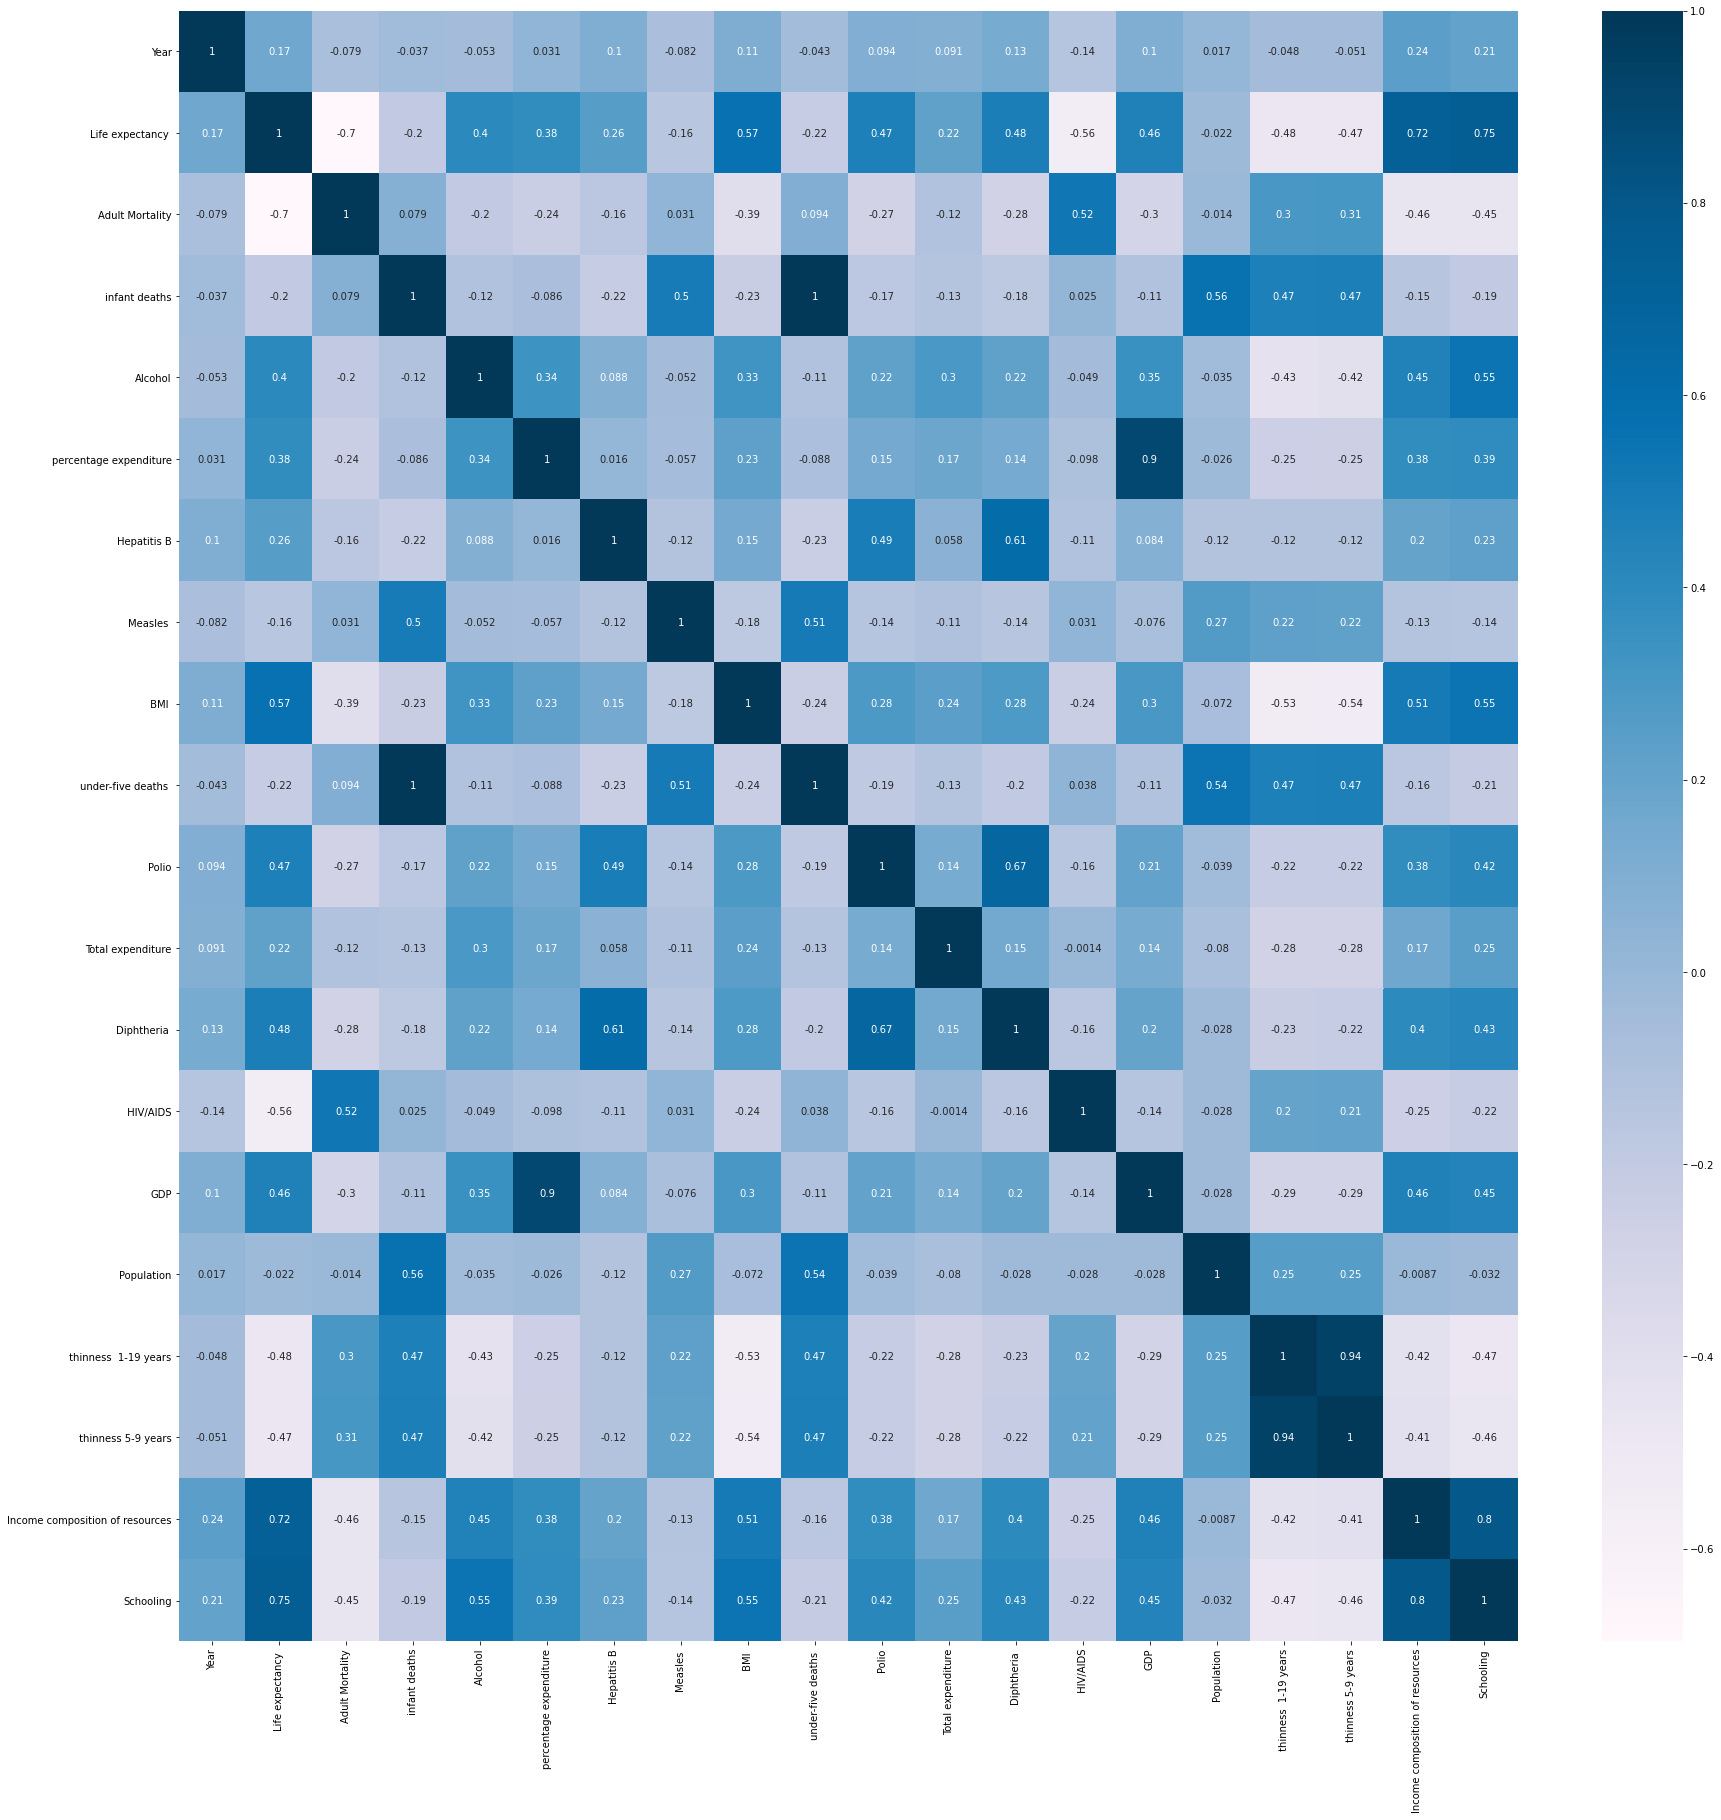

In [9]:
sns.heatmap(ld.corr(), annot = True, cmap = "PuBu")
plt.show()

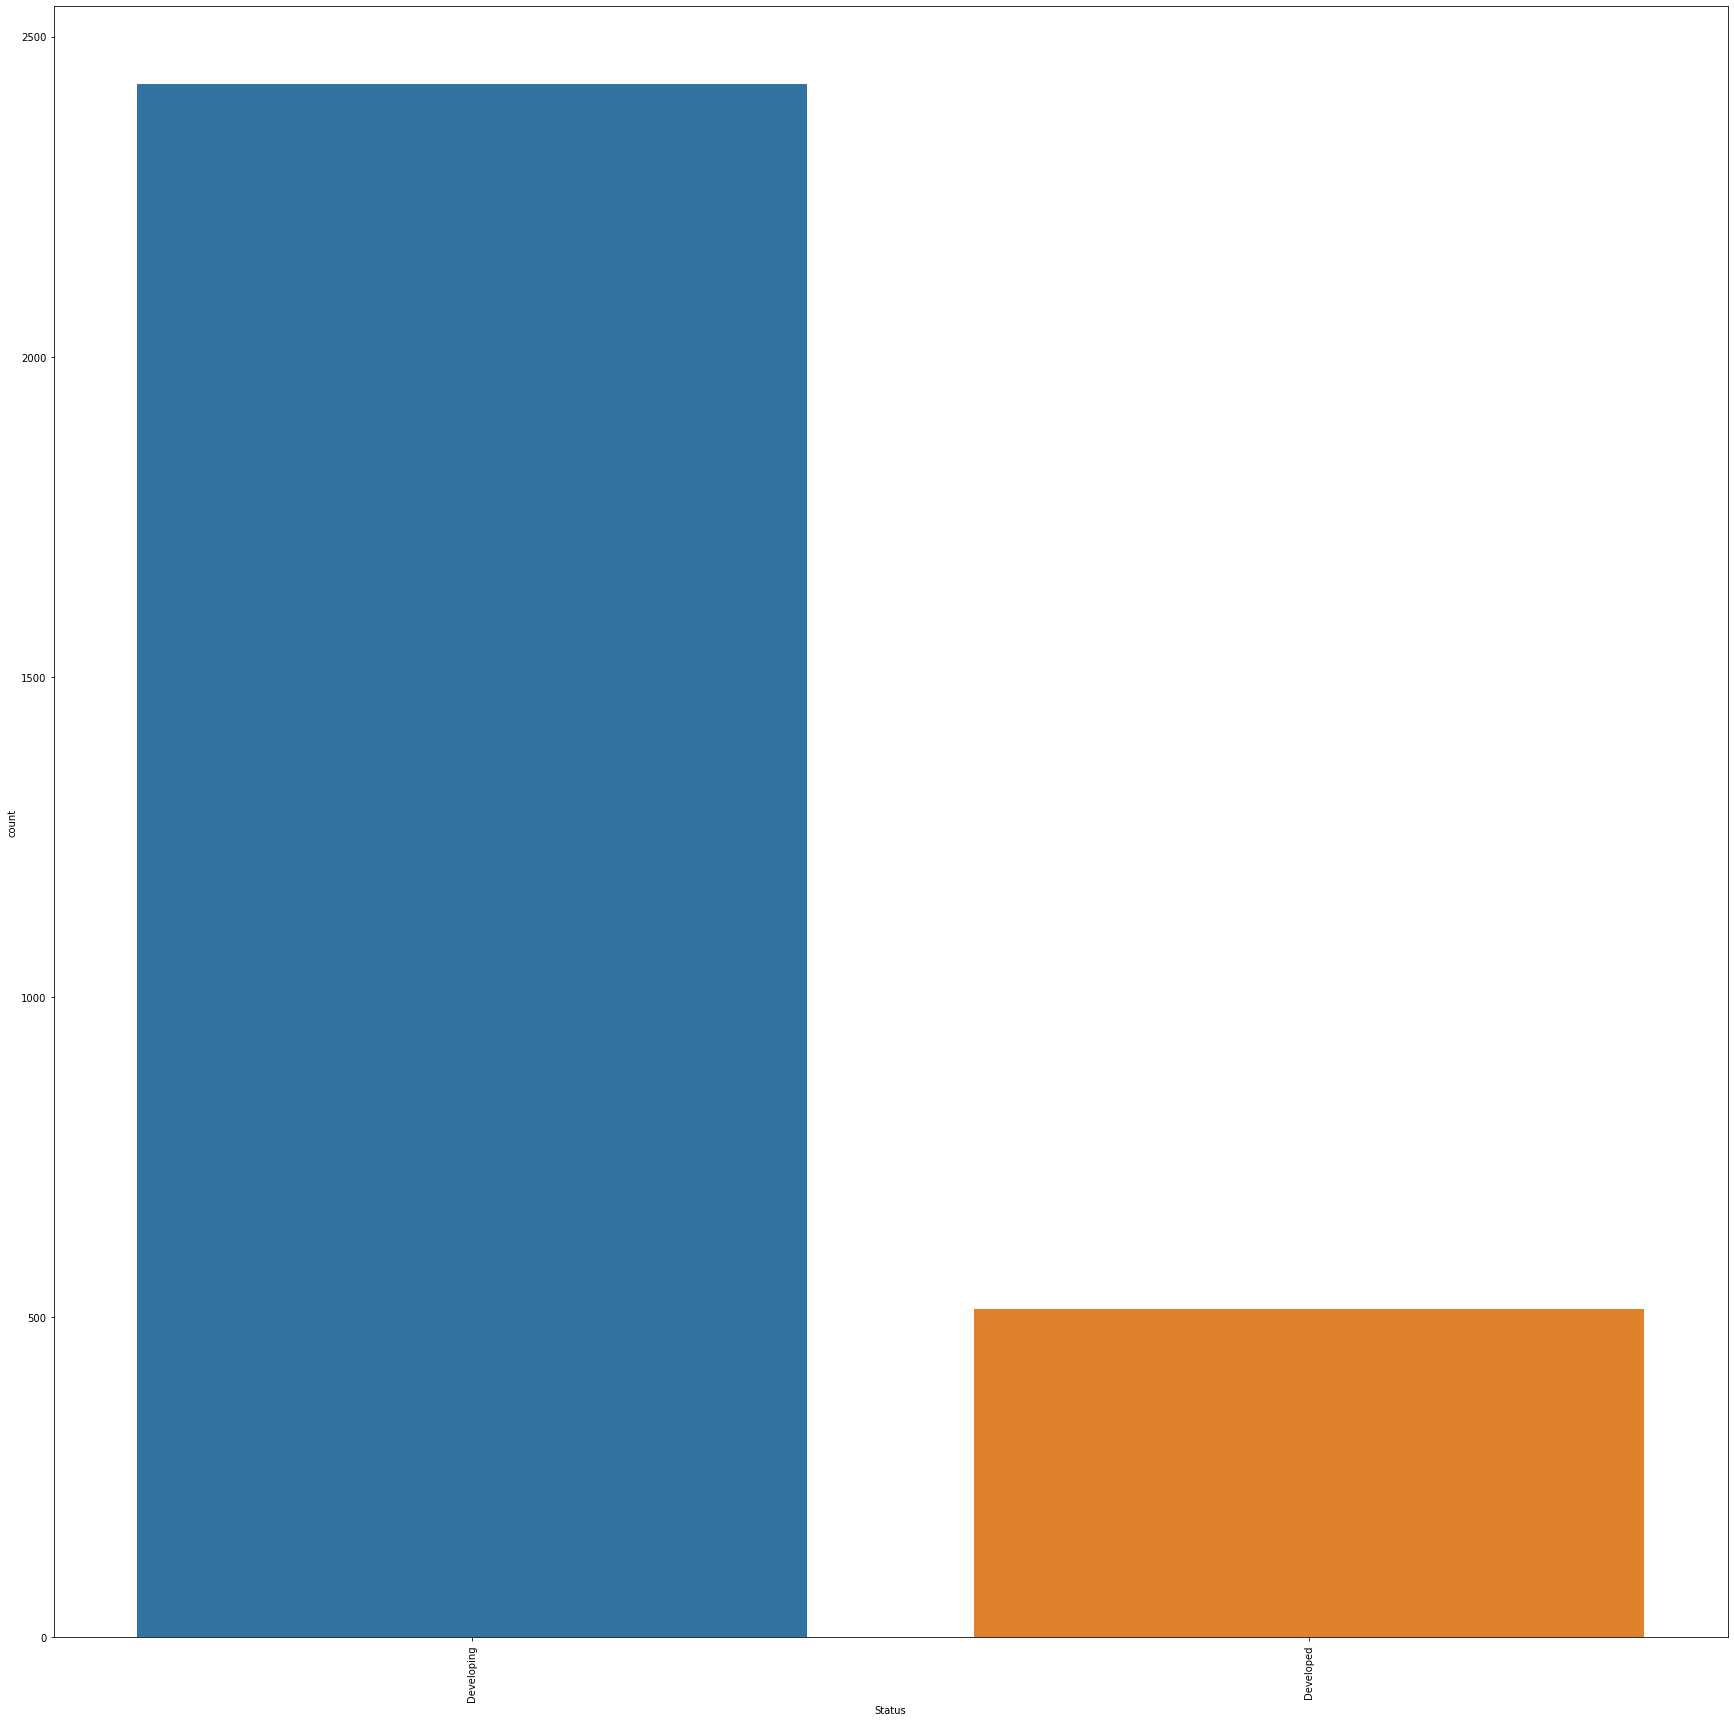

In [10]:
sns.countplot(x='Status',data=ld)
plt.xticks(rotation=90)

plt.show()

In [11]:
mean_dev=pd.Series([ld.loc[ld['Status']=='Developing','Life expectancy '].mean(),ld.loc[ld['Status']=='Developed','Life expectancy '].mean()])
cat=pd.Series(['Developing','Developed'])

In [12]:
cat

0    Developing
1     Developed
dtype: object

In [13]:
mean_dev

0   67.11
1   79.20
dtype: float64

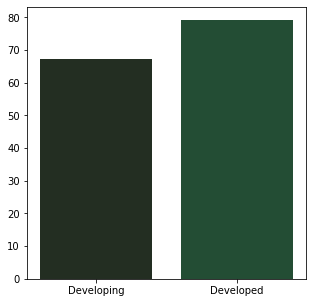

In [14]:
plt.figure(figsize=(5,5))
plt.bar(cat,mean_dev,color=['#232e22','#234d34'])
plt.show()

<h2>Splitting Data to Train and Test</h2>

In [15]:

ld.dropna(subset=['Life expectancy '],inplace=True)


In [16]:
X=ld.drop(['Life expectancy '],axis=1)
y=ld['Life expectancy ']

In [17]:
numcol=X._get_numeric_data().columns


In [18]:
catcol=X.select_dtypes(include=['object']).columns

In [19]:
catcol

Index(['Country', 'Status'], dtype='object')

In [20]:
cols=ld.columns

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test= train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

<h2>Using pipeline for model preprocessing</h2>

In [22]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [23]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="most_frequent")),
("pca", PCA(n_components=15,random_state=42)), 
])


In [24]:
mid_pipeline = ColumnTransformer([
("num", num_pipeline, numcol),

("cat", ohe, catcol),
])




In [25]:
X_train=pd.DataFrame(mid_pipeline.fit_transform(X_train))
X_val=pd.DataFrame(mid_pipeline.transform(X_val))
X_test=pd.DataFrame(mid_pipeline.transform(X_test))


In [26]:
Final_pipeline=ColumnTransformer([
("scaler", StandardScaler(), X_train.columns),
("pca", PCA(n_components=1,random_state=42), X_train.columns),
])


In [27]:
X_train=Final_pipeline.fit_transform(X_train)
X_val=Final_pipeline.transform(X_val)
X_test=Final_pipeline.transform(X_test)


<h2>Model Experiment</h2>

In [28]:
Rf=RandomForestRegressor(n_estimators=100, max_depth=30, random_state=42)
xg=XGBRegressor( n_estimators=100, random_state=42,learning_rate=0.1)
lg=LGBMRegressor( max_depth=30, random_state=42)
lr=Lasso(alpha=0.1)
xreg = ExtraTreesRegressor(n_estimators=100, max_depth=45, random_state=42)
model=[lr,Rf,xg,lg,xreg]

In [29]:
for i in model:
    i.fit(X_train,y_train)
    print(i)
    print('Training Accuracy = ',i.score(X_train,y_train)*100)
    print('validation Accuracy = ',i.score(X_val,y_val)*100)
    print('Testing Accuracy = ',i.score(X_test,y_test)*100)
    y_pred=i.predict(X_test)
    y_pred2=i.predict(X_val)
    print()
    print('Validation :')
    print('MSE = ',mean_squared_error(y_pred2,y_val))
    print('MAE = ',mean_absolute_error(y_pred2,y_val))
    print('RMSE = ',mean_squared_error(y_pred2,y_val,squared=False))
    print()
    print('Testing')
    print('MSE = ',mean_squared_error(y_pred,y_test))
    print('MAE = ',mean_absolute_error(y_pred,y_test))
    print('RMSE = ',mean_squared_error(y_pred,y_test,squared=False))
    
    print('----------------------------------------------------------------------------------------')

Lasso(alpha=0.1)
Training Accuracy =  93.17562457330433
validation Accuracy =  92.71174484626457
Testing Accuracy =  91.71301480110753

Validation :
MSE =  6.750382657052152
MAE =  1.9922721811344861
RMSE =  2.5981498526936724

Testing
MSE =  7.802817228273188
MAE =  2.0328433084290807
RMSE =  2.7933523279875003
----------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=30, random_state=42)
Training Accuracy =  99.02253836043002
validation Accuracy =  92.79768039572338
Testing Accuracy =  92.93525167701807

Validation :
MSE =  6.670789142492807
MAE =  1.5694230038503891
RMSE =  2.5827870881071107

Testing
MSE =  6.651989668733189
MAE =  1.7425316129302153
RMSE =  2.5791451430140935
----------------------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, ea

So, as we see here the most accurate algorithm here is the Extra Trees Regressor 🥳🥳